In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import data_exploration as file_de
import data_pre_processing as file_dpp
import ml_model_tidy_production as file_mltp
import ipywidgets

C:\Users\ericw\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ericw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ericw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df_list = file_dpp.main_proc()
main_df = df_list[-1]
main_df

(16593, 2)
(16713, 2)
(5516, 2)


name  \
0      LEVEL (Czech Republic)   
1                 GameCritics   
2           PC Games (Russia)   
3            Adventure Gamers   
4             Armchair Empire   
...                       ...   
32774              XboxAddict   
32775                    ICXM   
32776           Worth Playing   
32777        TrueAchievements   
32778                GameSpot   

                                                  review      game platform  \
0      Portal 2 is a masterpiece, a work of art that ...  portal 2       PC   
1      So do we need Portal 2? Do I need it? Maybe no...  portal 2       PC   
2      Portal 2 exceeds every expectation. It has a s...  portal 2       PC   
3      Like its predecessor, Portal 2 is not an adven...  portal 2       PC   
4      Pile on the "Oh, yes!" moments of solving some...  portal 2       PC   
...                                                  ...       ...      ...   
32774  Despite the lackluster quality with some of it...    ride 2     XOne   
32775  Ride 2 is a huge improvement over the original...    ride 2     XOne   
32776  Ride 2 is certainly an improvement over the or...    ride 2     XOne   
32777  Despite the addition of more bikes and tracks,...    ride 2     XOne   
32778  On paper, then, Ride 2 is an exciting proposit...    ride 2     XOne   

       score          date      Name Platform  Year_of_Release    Genre  ...  \
0      100.0  May 25, 2011  portal 2       PC           2011.0  Shooter  ...   
1      100.0  May  8, 2011  portal 2       PC           2011.0  Shooter  ...   
2      100.0  May  6, 2011  portal 2       PC           2011.0  Shooter  ...   
3      100.0  Apr 29, 2011  portal 2       PC           2011.0  Shooter  ...   
4      100.0  Apr 28, 2011  portal 2       PC           2011.0  Shooter  ...   
...      ...           ...       ...      ...              ...      ...  ...   
32774   70.0  Mar  7, 2017    ride 2     XOne           2016.0   Racing  ...   
32775   70.0  Feb 18, 2017    ride 2     XOne           2016.0   Racing  ...   
32776   65.0  Mar  9, 2017    ride 2     XOne           2016.0   Racing  ...   
32777   60.0  Oct 13, 2016    ride 2     XOne           2016.0   Racing  ...   
32778   40.0  Feb 24, 2017    ride 2     XOne           2016.0   Racing  ...   

      EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0         0.32       0.0          0.1          0.76          95.0   
1         0.32       0.0          0.1          0.76          95.0   
2         0.32       0.0          0.1          0.76          95.0   
3         0.32       0.0          0.1          0.76          95.0   
4         0.32       0.0          0.1          0.76          95.0   
...        ...       ...          ...           ...           ...   
32774     0.01       0.0          0.0          0.01           NaN   
32775     0.01       0.0          0.0          0.01           NaN   
32776     0.01       0.0          0.0          0.01           NaN   
32777     0.01       0.0          0.0          0.01           NaN   
32778     0.01       0.0          0.0          0.01           NaN   

       Critic_Count  User_Score  User_Count        Developer  Rating  
0              52.0         8.8      5999.0   Valve Software    E10+  
1              52.0         8.8      5999.0   Valve Software    E10+  
2              52.0         8.8      5999.0   Valve Software    E10+  
3              52.0         8.8      5999.0   Valve Software    E10+  
4              52.0         8.8      5999.0   Valve Software    E10+  
...             ...         ...         ...              ...     ...  
32774           NaN         8.2         6.0  Milestone S.r.l       E  
32775           NaN         8.2         6.0  Milestone S.r.l       E  
32776           NaN         8.2         6.0  Milestone S.r.l       E  
32777           NaN         8.2         6.0  Milestone S.r.l       E  
32778           NaN         8.2         6.0  Milestone S.r.l       E  

[32779 rows x 22 columns]

Generating Review Tokens -- 
Tokens DONE. Using Gensim Doc2Vec and KMeans to do clustering -- 
Number of texts processed:  32779
Clustering DONE. Evaluating using Silhouette Score -- 


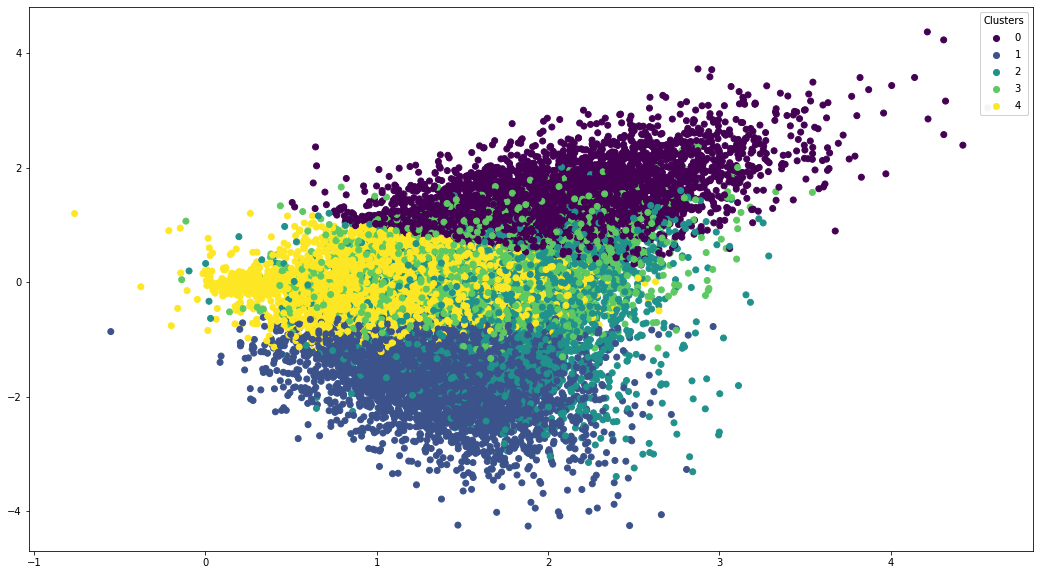

Production is done. Use [0] to see clustered dataframe or [1] for Silhouette Score.


name  \
0      LEVEL (Czech Republic)   
1                 GameCritics   
2           PC Games (Russia)   
3            Adventure Gamers   
4             Armchair Empire   
...                       ...   
32774              XboxAddict   
32775                    ICXM   
32776           Worth Playing   
32777        TrueAchievements   
32778                GameSpot   

                                                  review      game platform  \
0      Portal 2 is a masterpiece, a work of art that ...  portal 2       PC   
1      So do we need Portal 2? Do I need it? Maybe no...  portal 2       PC   
2      Portal 2 exceeds every expectation. It has a s...  portal 2       PC   
3      Like its predecessor, Portal 2 is not an adven...  portal 2       PC   
4      Pile on the "Oh, yes!" moments of solving some...  portal 2       PC   
...                                                  ...       ...      ...   
32774  Despite the lackluster quality with some of it...    ride 2     XOne   
32775  Ride 2 is a huge improvement over the original...    ride 2     XOne   
32776  Ride 2 is certainly an improvement over the or...    ride 2     XOne   
32777  Despite the addition of more bikes and tracks,...    ride 2     XOne   
32778  On paper, then, Ride 2 is an exciting proposit...    ride 2     XOne   

       score          date      Name Platform  Year_of_Release    Genre  ...  \
0      100.0  May 25, 2011  portal 2       PC           2011.0  Shooter  ...   
1      100.0  May  8, 2011  portal 2       PC           2011.0  Shooter  ...   
2      100.0  May  6, 2011  portal 2       PC           2011.0  Shooter  ...   
3      100.0  Apr 29, 2011  portal 2       PC           2011.0  Shooter  ...   
4      100.0  Apr 28, 2011  portal 2       PC           2011.0  Shooter  ...   
...      ...           ...       ...      ...              ...      ...  ...   
32774   70.0  Mar  7, 2017    ride 2     XOne           2016.0   Racing  ...   
32775   70.0  Feb 18, 2017    ride 2     XOne           2016.0   Racing  ...   
32776   65.0  Mar  9, 2017    ride 2     XOne           2016.0   Racing  ...   
32777   60.0  Oct 13, 2016    ride 2     XOne           2016.0   Racing  ...   
32778   40.0  Feb 24, 2017    ride 2     XOne           2016.0   Racing  ...   

      Other_Sales  Global_Sales  Critic_Score  Critic_Count  User_Score  \
0             0.1          0.76          95.0          52.0         8.8   
1             0.1          0.76          95.0          52.0         8.8   
2             0.1          0.76          95.0          52.0         8.8   
3             0.1          0.76          95.0          52.0         8.8   
4             0.1          0.76          95.0          52.0         8.8   
...           ...           ...           ...           ...         ...   
32774         0.0          0.01           NaN           NaN         8.2   
32775         0.0          0.01           NaN           NaN         8.2   
32776         0.0          0.01           NaN           NaN         8.2   
32777         0.0          0.01           NaN           NaN         8.2   
32778         0.0          0.01           NaN           NaN         8.2   

       User_Count        Developer  Rating  \
0          5999.0   Valve Software    E10+   
1          5999.0   Valve Software    E10+   
2          5999.0   Valve Software    E10+   
3          5999.0   Valve Software    E10+   
4          5999.0   Valve Software    E10+   
...           ...              ...     ...   
32774         6.0  Milestone S.r.l       E   
32775         6.0  Milestone S.r.l       E   
32776         6.0  Milestone S.r.l       E   
32777         6.0  Milestone S.r.l       E   
32778         6.0  Milestone S.r.l       E   

                                           review_tokens  cluster_label  
0      [portal, 2, is, a, masterpiece, ,, a, work, of...              4  
1      [so, do, we, need, portal, 2, ?, do, i, need, ...              1  
2      [portal, 2, exceeds, every, expecta

In [3]:
model_output = file_mltp.gensim_doctovec_kmeans(main_df, 8, 100)
main_df = model_output[0]
main_df

In [6]:
# file_de.draw_word_clouds_for_clusters(main_df, 5)

# BUFFER CELL

# WHATEVER IS DOWN BELOW IS WORK-IN-PROGRESS

# PROCEED WITH CAUTION

In [7]:
main_df["cluster_label"].value_counts()

4    9085
1    6510
3    6335
0    5611
2    5238
Name: cluster_label, dtype: int64

In [12]:
model_output[1]

0.26880187

In [10]:
main_df = file_dpp.filter_by_review_count(main_df, 100)
main_df

name  \
0      LEVEL (Czech Republic)   
1                 GameCritics   
5             Game Revolution   
7                    DarkZero   
8                 GamesRadar+   
...                       ...   
32771       Metro GameCentral   
32772               MondoXbox   
32773                 USgamer   
32776           Worth Playing   
32778                GameSpot   

                                                  review  \
0      Portal 2 is a masterpiece, a work of art that ...   
1      So do we need Portal 2? Do I need it? Maybe no...   
5      Impatience aside, Portal 2 is an exceptionally...   
7      In conclusion, Portal 2 is a textbook example ...   
8      Portal 2 couldn't be Portal, but it's the next...   
...                                                  ...   
32771  An astonishingly shallow and repetitive game e...   
32772  A definite improvement over the previous game,...   
32773  Featuring an impressive roster of bikes and tr...   
32776  Ride 2 is certainly an improvement over the or...   
32778  On paper, then, Ride 2 is an exciting proposit...   

                                   game platform  score          date  \
0                              portal 2       PC  100.0  May 25, 2011   
1                              portal 2       PC  100.0  May  8, 2011   
5                              portal 2       PC  100.0  Apr 22, 2011   
7                              portal 2       PC  100.0  Apr 21, 2011   
8                              portal 2       PC  100.0  Apr 21, 2011   
...                                 ...      ...    ...           ...   
32771  berserk and the band of the hawk      PS4   30.0  Feb 27, 2017   
32772                            ride 2     XOne   85.0  Oct 14, 2016   
32773                            ride 2     XOne   80.0  Feb 28, 2017   
32776                            ride 2     XOne   65.0  Mar  9, 2017   
32778                            ride 2     XOne   40.0  Feb 24, 2017   

                                   Name Platform  Year_of_Release    Genre  \
0                              portal 2       PC           2011.0  Shooter   
1                              portal 2       PC           2011.0  Shooter   
5                              portal 2       PC           2011.0  Shooter   
7                              portal 2       PC           2011.0  Shooter   
8                              portal 2       PC           2011.0  Shooter   
...                                 ...      ...              ...      ...   
32771  berserk and the band of the hawk      PS4           2016.0   Action   
32772                            ride 2     XOne           2016.0   Racing   
32773                            ride 2     XOne           2016.0   Racing   
32776                            ride 2     XOne           2016.0   Racing   
32778                            ride 2     XOne           2016.0   Racing   

       ... Other_Sales  Global_Sales  Critic_Score  Critic_Count  User_Score  \
0      ...         0.1          0.76          95.0          52.0         8.8   
1      ...         0.1          0.76          95.0          52.0         8.8   
5      ...         0.1          0.76          95.0          52.0         8.8   
7      ...         0.1          0.76          95.0          52.0         8.8   
8      ...         0.1          0.76          95.0          52.0         8.8   
...    ...         ...           ...           ...           ...         ...   
32771  ...         0.0          0.04           NaN           NaN         NaN   
32772  ...         0.0          0.01           NaN           NaN         8.2   
32773  ...         0.0          0.01           NaN           NaN         8.2   
32776  ...         0.0          0.01           NaN           NaN         8.2   
32778  ...         0.0          0.01           NaN           NaN         8.2   

       User_Count        Developer  Rating  \
0          5999.0   Valve Software    E10+   
1          5999.0   Valve Software    E1

In [11]:
main_df["name"].value_counts()

IGN                              611
GameSpot                         552
Vandal                           533
Multiplayer.it                   524
Everyeye.it                      473
                                ... 
RPGamer                          106
Game World Navigator Magazine    105
Gamestyle                        103
Eurogamer Sweden                 103
GameCrate                        103
Name: name, Length: 115, dtype: int64